In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetching data from the provided link
url = 'https://www.mohfw.gov.in/data/datanew.json'
response = requests.get(url)
data = response.json()

In [3]:
# Converting the data to a DataFrame
df = pd.DataFrame(data)

In [4]:
# Filtering out unnecessary rows
df = df[1:][['state_name', 'active', 'cured', 'death']].astype({'active': int, 'cured': int, 'death': int})

In [5]:
df.to_csv('covid_data.csv', index=False)

In [6]:
df1=pd.read_csv('covid_data.csv')

In [7]:
df1 = df1.iloc[1:]

In [8]:
df1.to_csv('covid_data_without_first_row.csv', index=False)

In [9]:
df1

,state_name,active,cured,death
1,Arunachal Pradesh,0,66753,296
2,Assam,0,738130,8035
3,Bihar,0,842953,12314
4,Chandigarh,0,99514,1185
5,Chhattisgarh,1,1173507,14190
6,Dadra and Nagar Haveli and Daman and Diu,0,11588,4
7,Delhi,2,2014444,26668
8,Goa*,2,259362,4014
9,Gujarat,2,1280379,11080
10,Haryana,0,1068189,10779


****Handling the NaN Values****

In [10]:
import numpy as np
def handle_null_values(df1):
    for col in df.columns:
        if df1[col].dtype=="int64":
            df1[col]=df1[col].replace(np.nan,0)
            df1[col]=df1[col].replace(0,np.median(df1[col]))
        elif df1[col].dtype=="float64":
            df1[col]=df1[col].replace(np.nan,np.mean(df1[col]))
        else:
            df1[col]=df1[col].replace(np.nan,df1[col].mode()[0])
    return df1
df1=handle_null_values(df1)

####Arranging the data in decending order###

In [15]:
# Sorting the DataFrame based on different criteria
top_active_states = df1.sort_values(by='active', ascending=False).head(7)
top_cured_states = df1.sort_values(by='cured', ascending=False).head(7)
top_death_states = df1.sort_values(by='death', ascending=False).head(7)

<Figure size 1000x1500 with 0 Axes>

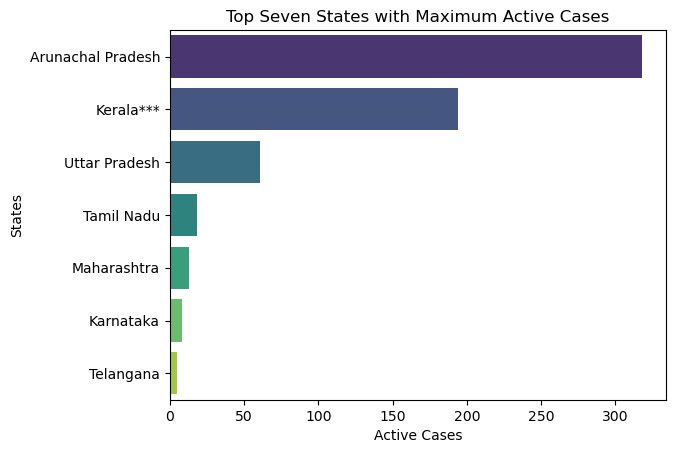

<Figure size 1000x1500 with 0 Axes>

In [16]:
# Visualization 1: Top Seven States with Maximum Active Cases

sns.barplot(x='active', y='state_name', data=top_active_states, palette='viridis')
plt.title('Top Seven States with Maximum Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('States')
plt.figure(figsize=(10, 15))

<Figure size 1000x1500 with 0 Axes>

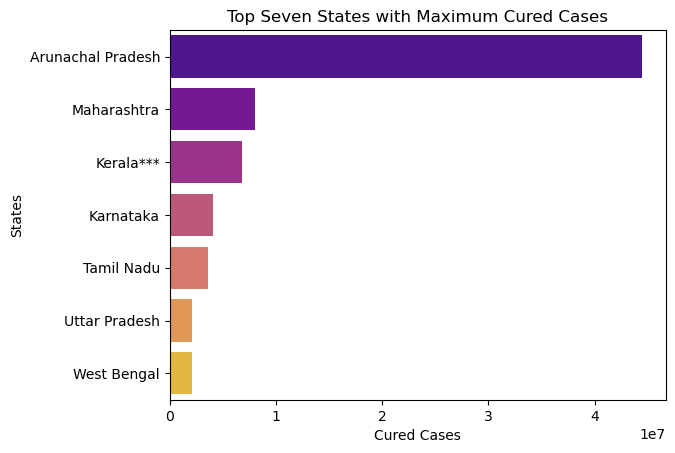

<Figure size 1000x1500 with 0 Axes>

In [17]:
# Visualization 2: Top Seven States with Maximum Cured Cases

sns.barplot(x='cured', y='state_name', data=top_cured_states, palette='plasma')
plt.title('Top Seven States with Maximum Cured Cases')
plt.xlabel('Cured Cases')
plt.ylabel('States')
plt.figure(figsize=(10, 15))

Text(0, 0.5, 'States')

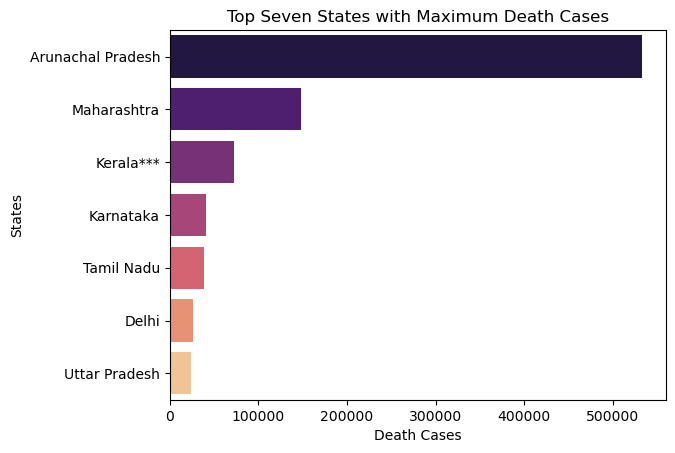

In [18]:
# Visualization 3: Top Seven States with Maximum Death Cases

sns.barplot(x='death', y='state_name', data=top_death_states, palette='magma')
plt.title('Top Seven States with Maximum Death Cases')
plt.xlabel('Death Cases')
plt.ylabel('States')